In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

72.10436840127443 -166.7868446919022
-79.37595438159953 -131.61953966979445
-45.57465690052704 126.94778397567592
-85.40246446876623 -40.36297161993494
58.5116321261232 -115.76638493920098
-46.81123771651694 -60.79748903866509
-88.81161419555066 -37.87003522188641
13.977099231905726 26.288285345716332
-42.97965750171572 -114.82733852926664
-40.91306309230684 -178.97301962400672
76.26990341567907 110.26689362648023
-80.02962647809395 160.8002592024681
-53.011405844630985 -51.127799309294886
69.58002473438043 -136.2539833459544
-32.55923266376448 146.2782976196745
-30.24901400709453 -173.5638951356496
69.54347362579958 -35.39476347396456
27.777222217627056 87.26424221847896
19.208675163963733 2.042798493836159
69.00274587126304 74.55040944635581
89.58853988840431 118.13343357483183
76.73962140548304 -101.04499926788725
61.8478178148649 -0.012085472497091132
-54.42665541091644 84.14341090567137
-82.89728959698914 68.76741275241068
-86.64673229354699 174.654224233754
39.1796486577675 13.55

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Create an empty list to hold the eather data.
city_data= []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(5)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nome
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | high level
Processing Record 6 of Set 1 | rawson
Processing Record 7 of Set 1 | umm kaddadah
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | aklavik
Processing Record 13 of Set 1 | griffith
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | khandbari
Processing Record 16 of Set 1 | kidal
Processing Record 17 of Set 1 | pangody
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | brae
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | capaci
Processing Record 23 of Set 1 | pinega
Processing Record 24 of Set 1 | hithadhoo
Proc

Processing Record 41 of Set 4 | huercal-overa
Processing Record 42 of Set 4 | arraial do cabo
Processing Record 43 of Set 4 | san pedro del parana
Processing Record 44 of Set 4 | liwale
Processing Record 45 of Set 4 | souillac
Processing Record 46 of Set 4 | tigzirt
Processing Record 47 of Set 4 | ribeirao do pinhal
City not found. Skipping...
Processing Record 48 of Set 4 | kapaa
Processing Record 49 of Set 4 | paradwip
City not found. Skipping...
Processing Record 50 of Set 4 | port lincoln
Processing Record 1 of Set 5 | krasnyy chikoy
Processing Record 2 of Set 5 | bolshiye uki
City not found. Skipping...
Processing Record 3 of Set 5 | tra vinh
Processing Record 4 of Set 5 | victoria
Processing Record 5 of Set 5 | kollo
Processing Record 6 of Set 5 | tamana
Processing Record 7 of Set 5 | mananjary
Processing Record 8 of Set 5 | mahebourg
Processing Record 9 of Set 5 | iwanai
Processing Record 10 of Set 5 | rabat
Processing Record 11 of Set 5 | zhangjiakou
Processing Record 12 of Set

Processing Record 25 of Set 8 | san jeronimo
Processing Record 26 of Set 8 | opuwo
Processing Record 27 of Set 8 | sakaiminato
Processing Record 28 of Set 8 | grindavik
Processing Record 29 of Set 8 | bengkulu
Processing Record 30 of Set 8 | haibowan
City not found. Skipping...
Processing Record 31 of Set 8 | ukiah
Processing Record 32 of Set 8 | grandview
Processing Record 33 of Set 8 | iquitos
Processing Record 34 of Set 8 | imeni poliny osipenko
Processing Record 35 of Set 8 | zakamensk
Processing Record 36 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 37 of Set 8 | urumqi
Processing Record 38 of Set 8 | korla
Processing Record 39 of Set 8 | morris
Processing Record 40 of Set 8 | terney
Processing Record 41 of Set 8 | ballina
Processing Record 42 of Set 8 | ocean springs
Processing Record 43 of Set 8 | coihueco
Processing Record 44 of Set 8 | katsuura
Processing Record 45 of Set 8 | maceio
Processing Record 46 of Set 8 | gladstone
Processing Record 47 of Set 8 | 

Processing Record 15 of Set 12 | kijang
Processing Record 16 of Set 12 | yakeshi
Processing Record 17 of Set 12 | maltahohe
Processing Record 18 of Set 12 | foam lake
Processing Record 19 of Set 12 | luau
Processing Record 20 of Set 12 | lluta
Processing Record 21 of Set 12 | loa janan
Processing Record 22 of Set 12 | lazaro cardenas
Processing Record 23 of Set 12 | meyungs
City not found. Skipping...
Processing Record 24 of Set 12 | ballitoville
Processing Record 25 of Set 12 | peniche
Processing Record 26 of Set 12 | traverse city
Processing Record 27 of Set 12 | mizan teferi
Processing Record 28 of Set 12 | chenzhou
Processing Record 29 of Set 12 | guaymas
Processing Record 30 of Set 12 | ust-ordynskiy
Processing Record 31 of Set 12 | menongue
Processing Record 32 of Set 12 | san miguelito
Processing Record 33 of Set 12 | marzuq
Processing Record 34 of Set 12 | goes
Processing Record 35 of Set 12 | mareeba
Processing Record 36 of Set 12 | victor harbor
Processing Record 37 of Set 12

In [12]:
len(city_data)

574

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nome,64.5011,-165.4064,39.27,66,0,3.44,US,2022-10-02 20:44:39
1,Rikitea,-23.1203,-134.9692,74.44,65,14,2.30,PF,2022-10-02 20:44:39
2,Esperance,-33.8667,121.9000,53.67,76,80,17.52,AU,2022-10-02 20:44:40
3,Ushuaia,-54.8000,-68.3000,49.66,40,0,3.44,AR,2022-10-02 20:41:32
4,High Level,58.5169,-117.1360,62.71,29,40,9.22,CA,2022-10-02 20:40:08
5,Rawson,-43.3002,-65.1023,52.57,47,100,17.74,AR,2022-10-02 20:40:52
6,Umm Kaddadah,13.6017,26.6876,90.45,33,81,6.17,SD,2022-10-02 20:44:41
7,Vaini,-21.2000,-175.2000,78.96,69,75,9.22,TO,2022-10-02 20:44:41
8,Saskylakh,71.9167,114.0833,25.88,94,100,14.76,RU,2022-10-02 20:44:42
9,Bluff,-46.6000,168.3333,47.80,74,99,23.98,NZ,2022-10-02 20:44:42


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order] 
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nome,US,2022-10-02 20:44:39,64.5011,-165.4064,39.27,66,0,3.44
1,Rikitea,PF,2022-10-02 20:44:39,-23.1203,-134.9692,74.44,65,14,2.30
2,Esperance,AU,2022-10-02 20:44:40,-33.8667,121.9000,53.67,76,80,17.52
3,Ushuaia,AR,2022-10-02 20:41:32,-54.8000,-68.3000,49.66,40,0,3.44
4,High Level,CA,2022-10-02 20:40:08,58.5169,-117.1360,62.71,29,40,9.22
...,...,...,...,...,...,...,...,...,...
569,Tura,IN,2022-10-02 20:50:16,25.5198,90.2201,73.20,97,100,2.93
570,Gonbad-E Qabus,IR,2022-10-02 20:50:17,37.2500,55.1672,71.58,46,0,4.38
571,Abu Kamal,SY,2022-10-02 20:50:18,34.4506,40.9171,81.21,20,0,7.99
572,Akdepe,TM,2022-10-02 20:50:18,42.0551,59.3788,44.69,24,2,8.90


In [15]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file,index_label = "City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

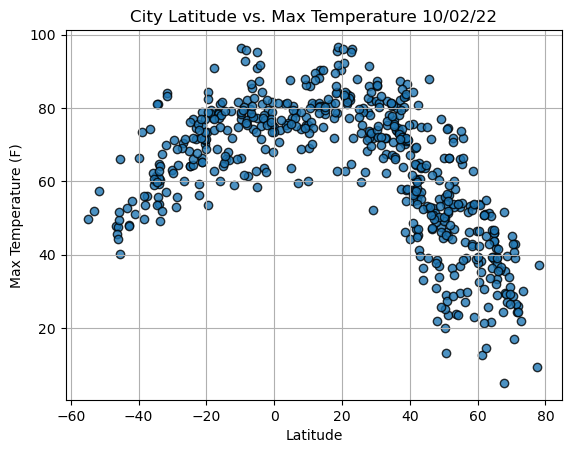

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

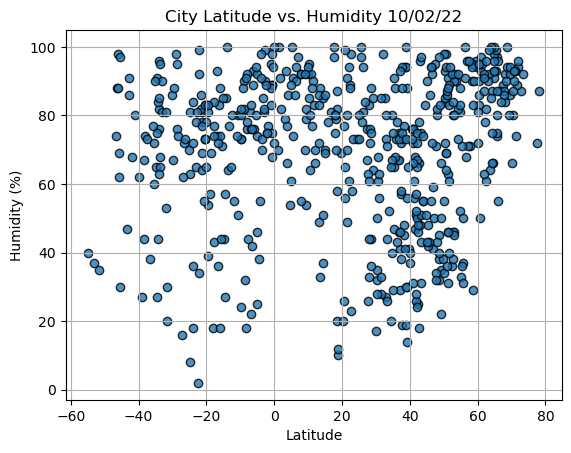

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

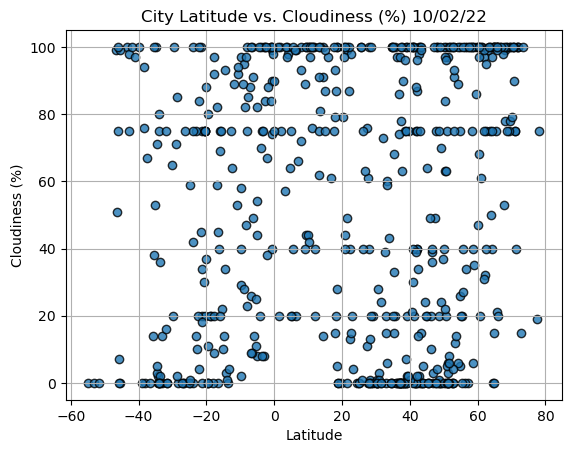

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

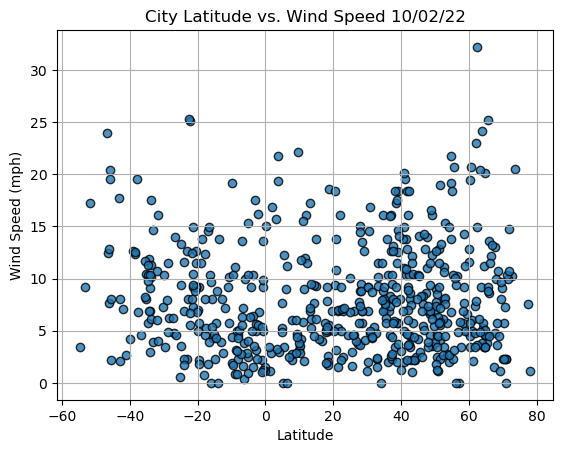

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [22]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [23]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [24]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

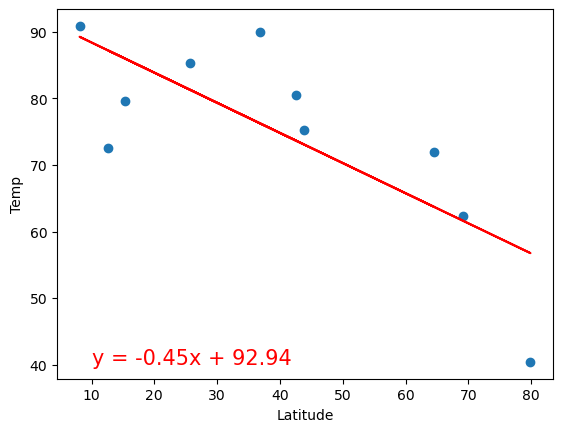

In [25]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [26]:

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                     Tasiilaq
Country                        GL
Date          2022-10-02 20:44:43
Lat                       65.6145
Lng                      -37.6368
Max Temp                    39.36
Humidity                       97
Cloudiness                    100
Wind Speed                  25.23
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
569     True
570     True
571     True
572     True
573    False
Name: Lat, Length: 574, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nome,US,2022-10-02 20:44:39,64.5011,-165.4064,39.27,66,0,3.44
4,High Level,CA,2022-10-02 20:40:08,58.5169,-117.1360,62.71,29,40,9.22
6,Umm Kaddadah,SD,2022-10-02 20:44:41,13.6017,26.6876,90.45,33,81,6.17
8,Saskylakh,RU,2022-10-02 20:44:42,71.9167,114.0833,25.88,94,100,14.76
11,Aklavik,CA,2022-10-02 20:42:23,68.2191,-135.0107,29.64,92,99,3.65


In [30]:
# Create Nothern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

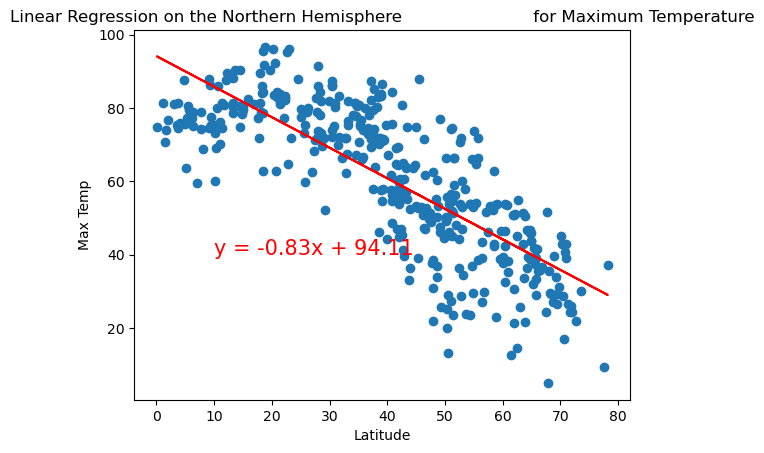

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

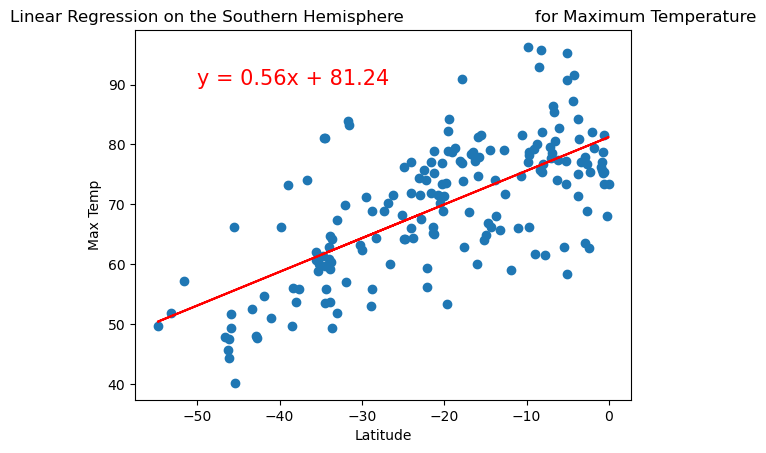

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

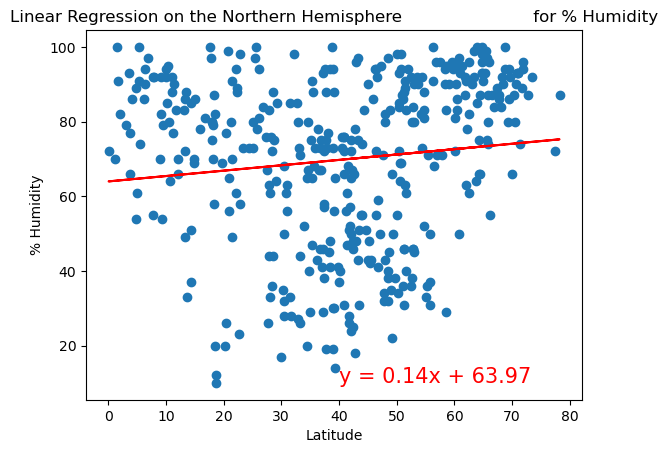

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

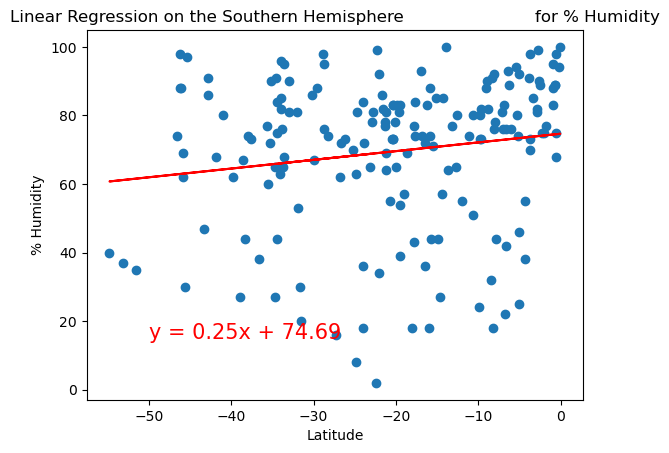

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

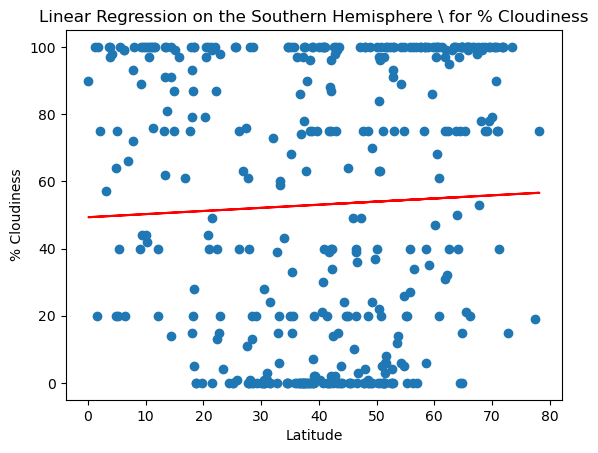

In [35]:
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Cloudiness','% Cloudiness', (-50,15))

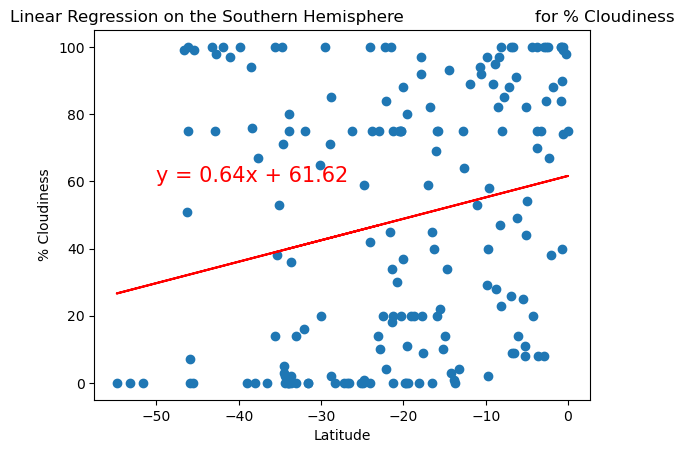

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

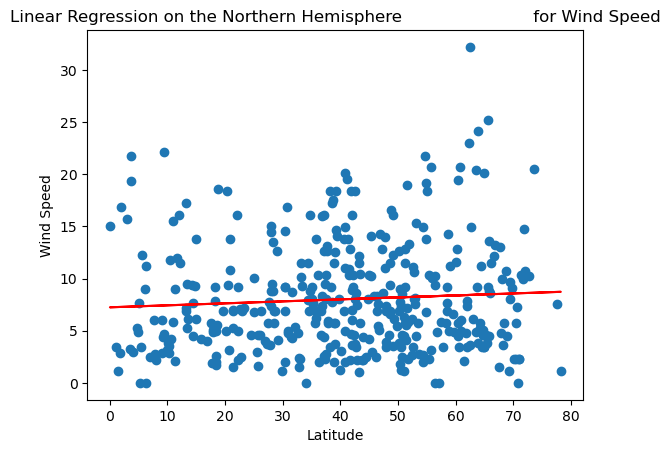

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

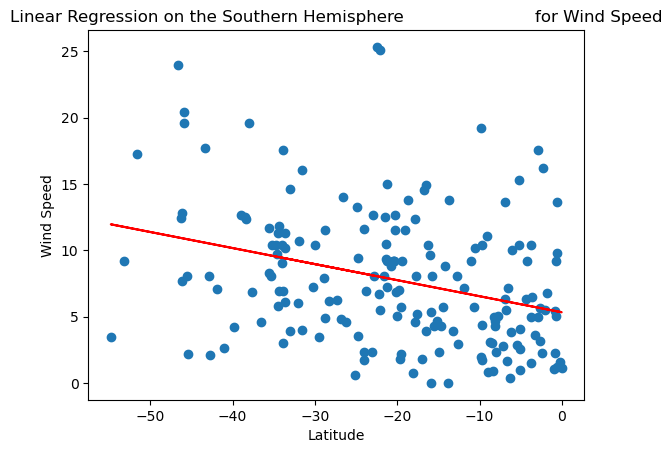

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [39]:
pip install gmaps


Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install gaps

Note: you may need to restart the kernel to use updated packages.
